In [38]:
import pandas as pd
from sklearn.metrics import mutual_info_score
import numpy as np

link = 'https://raw.githubusercontent.com/farisknight13/Python_ML/main/lung-cancer.csv'
df = pd.read_csv(link)
df


C1  C2  C3  C4 C5  C6  C7  C8  ...  C50  C51  C52  C53  C54  C55  C56  C57
0    1   0   3   0  ?   0   2   2  ...    2    2    2    1    1    1    2    2
1    1   0   3   3  1   0   3   1  ...    2    2    2    2    2    1    2    2
2    1   0   3   3  2   0   3   3  ...    2    2    2    2    2    2    1    2
3    1   0   2   3  2   1   3   3  ...    2    2    2    2    2    2    2    2
4    1   0   3   2  1   1   3   3  ...    2    2    2    2    2    1    2    2
5    1   0   3   3  2   0   3   3  ...    2    2    2    2    2    2    1    2
6    1   0   3   2  1   0   3   3  ...    2    2    1    2    2    2    1    2
7    1   0   2   2  1   0   3   1  ...    1    2    2    2    2    1    2    2
8    1   0   3   1  1   0   3   1  ...    2    2    2    2    2    1    2    2
9    2   0   2   3  2   0   2   2  ...    2    1    3    2    1    1    2    2
10   2   0   2   2  0   0   3   2  ...    2    2    2    2    2    2    2    2
11   2   0   2   3  2   0   1   2  ...    2    2    2    1    1    2    2    1
12   2   0   2   1  1   0   1   2  ...    2    2    2    2    2    1    2    2
13   2   0   2   2  1   1   2   3  ...    2    2    2    1    1    1    2    2
14   2   1   3   0  ?   1   1   2  ...    2    2    2    2    2    1    2    1
15   2   0   3   2  2   1   2   2  ...    2    2    2    2    2    2    2    2
16   2   0   3   2  2   0   1   1  ...    2    2    2    2    2    1    2    2
17   2   0   2   1  1   0   2   1  ...    2    2    2    1    1    1    2    2
18   2   0   2   0  ?   0   2   3  ...    2    2    2    2    2    2    1    2
19   2   0   1   2  1   0   3   3  ...    2    2    2    1    1    2    2    1
20   2   0   2   0  ?   1   3   3  ...    2    2    1    2    2    1    2    2
21   2   0   3   3  2   0   2   1  ...    1    2    2    2    2    2    1    2
22   3   0   2   3  1   1   2   2  ...    3    3    1    3    3    2    2    1
23   3   0   2   3  1   1   1   2  ...    2    2    2    2    2    2    2    1
24   3   0   3   3  1   0   3   3  ...    2    2    3    2    2    2    2    1
25   3   0   2   3  2   0   1   2  ...    2    1    3    1    2    2    1    2
26   3   0   2   2  2   0   2   1  ...    2    2    2    2    2    1    2    1
27   3   0   2   2  1   0   2   2  ...    2    2    3    2    2    2    2    1
28   3   0   3   2  2   0   2   2  ...    2    3    1    2    2    2    2    2
29   3   0   2   1  1   0   2   2  ...    3    2    2    2    2    2    2    1
30   3   0   2   3  2   1   2   2  ...    2    2    2    2    2    1    2    2
31   3   0   2   3  1   0   2   3  ...    2    2    2    2    2    2    2    2

[32 rows x 57 columns]

# Missing value

In [39]:
df = df.drop(['C5'],axis=1)
df = df.drop(['C39'],axis=1)
df

C1  C2  C3  C4  C6  C7  C8  C9  ...  C50  C51  C52  C53  C54  C55  C56  C57
0    1   0   3   0   0   2   2   2  ...    2    2    2    1    1    1    2    2
1    1   0   3   3   0   3   1   3  ...    2    2    2    2    2    1    2    2
2    1   0   3   3   0   3   3   3  ...    2    2    2    2    2    2    1    2
3    1   0   2   3   1   3   3   3  ...    2    2    2    2    2    2    2    2
4    1   0   3   2   1   3   3   3  ...    2    2    2    2    2    1    2    2
5    1   0   3   3   0   3   3   3  ...    2    2    2    2    2    2    1    2
6    1   0   3   2   0   3   3   3  ...    2    2    1    2    2    2    1    2
7    1   0   2   2   0   3   1   3  ...    1    2    2    2    2    1    2    2
8    1   0   3   1   0   3   1   3  ...    2    2    2    2    2    1    2    2
9    2   0   2   3   0   2   2   2  ...    2    1    3    2    1    1    2    2
10   2   0   2   2   0   3   2   3  ...    2    2    2    2    2    2    2    2
11   2   0   2   3   0   1   2   1  ...    2    2    2    1    1    2    2    1
12   2   0   2   1   0   1   2   2  ...    2    2    2    2    2    1    2    2
13   2   0   2   2   1   2   3   3  ...    2    2    2    1    1    1    2    2
14   2   1   3   0   1   1   2   2  ...    2    2    2    2    2    1    2    1
15   2   0   3   2   1   2   2   2  ...    2    2    2    2    2    2    2    2
16   2   0   3   2   0   1   1   3  ...    2    2    2    2    2    1    2    2
17   2   0   2   1   0   2   1   3  ...    2    2    2    1    1    1    2    2
18   2   0   2   0   0   2   3   3  ...    2    2    2    2    2    2    1    2
19   2   0   1   2   0   3   3   3  ...    2    2    2    1    1    2    2    1
20   2   0   2   0   1   3   3   3  ...    2    2    1    2    2    1    2    2
21   2   0   3   3   0   2   1   3  ...    1    2    2    2    2    2    1    2
22   3   0   2   3   1   2   2   1  ...    3    3    1    3    3    2    2    1
23   3   0   2   3   1   1   2   1  ...    2    2    2    2    2    2    2    1
24   3   0   3   3   0   3   3   1  ...    2    2    3    2    2    2    2    1
25   3   0   2   3   0   1   2   2  ...    2    1    3    1    2    2    1    2
26   3   0   2   2   0   2   1   2  ...    2    2    2    2    2    1    2    1
27   3   0   2   2   0   2   2   2  ...    2    2    3    2    2    2    2    1
28   3   0   3   2   0   2   2   2  ...    2    3    1    2    2    2    2    2
29   3   0   2   1   0   2   2   1  ...    3    2    2    2    2    2    2    1
30   3   0   2   3   1   2   2   3  ...    2    2    2    2    2    1    2    2
31   3   0   2   3   0   2   3   3  ...    2    2    2    2    2    2    2    2

[32 rows x 55 columns]

# SFFS

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
knn = KNeighborsClassifier(n_neighbors=2)

sffs = SFS(knn, 
           k_features=50, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=8,
           n_jobs=-1)
sffs = sffs.fit(X, y)
df_sffs = pd.DataFrame.from_dict(sffs.get_metric_dict()).T.copy()
df_sffs

feature_idx  ...    std_err
1                                                (7,)  ...     0.0625
2                                             (7, 39)  ...  0.0457453
3                                         (7, 30, 39)  ...  0.0409159
4                                      (7, 9, 30, 39)  ...  0.0409159
5                                   (1, 7, 9, 30, 39)  ...  0.0409159
6                                (1, 2, 7, 9, 11, 30)  ...    0.03125
7                             (1, 2, 7, 8, 9, 11, 30)  ...    0.03125
8                         (1, 2, 7, 8, 9, 11, 16, 30)  ...    0.03125
9                     (1, 2, 7, 8, 9, 11, 16, 17, 30)  ...    0.03125
10                (1, 2, 7, 8, 9, 11, 16, 17, 30, 42)  ...    0.03125
11            (1, 2, 7, 8, 9, 11, 16, 17, 30, 37, 42)  ...    0.03125
12        (1, 2, 7, 8, 9, 11, 16, 17, 20, 30, 37, 42)  ...    0.03125
13    (1, 2, 7, 8, 9, 11, 16, 17, 20, 30, 37, 38, 42)  ...    0.03125
14  (1, 2, 7, 8, 9, 11, 16, 17, 20, 30, 37, 38, 42...  ...    0.03125
15  (1, 2, 7, 8, 9, 11, 16, 17, 20, 30, 37, 38, 42...  ...    0.03125
16  (1, 2, 7, 8, 9, 11, 16, 17, 20, 30, 37, 38, 42...  ...    0.03125
17  (1, 2, 4, 7, 8, 9, 11, 16, 17, 20, 30, 37, 38,...  ...  0.0409159
18  (1, 2, 4, 7, 8, 9, 11, 14, 16, 17, 20, 30, 37,...  ...    0.03125
19  (1, 2, 4, 7, 8, 9, 11, 14, 16, 17, 20, 30, 37,...  ...    0.03125
20  (1, 2, 4, 7, 8, 9, 11, 14, 16, 17, 20, 30, 37,...  ...    0.03125
21  (1, 2, 4, 5, 7, 8, 9, 11, 14, 16, 17, 20, 30, ...  ...  0.0409159
22  (1, 2, 4, 5, 7, 8, 9, 11, 14, 16, 17, 20, 30, ...  ...    0.03125
23  (1, 2, 4, 7, 8, 9, 11, 12, 14, 16, 17, 20, 21,...  ...    0.03125
24  (1, 2, 4, 7, 8, 9, 11, 12, 14, 15, 16, 17, 20,...  ...    0.03125
25  (1, 2, 4, 7, 8, 9, 11, 12, 14, 15, 16, 17, 20,...  ...    0.03125
26  (1, 2, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, ...  ...  0.0409159
27  (1, 2, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, ...  ...  0.0409159
28  (1, 2, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, ...  ...  0.0457453
29  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 1...  ...  0.0409159
30  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 1...  ...  0.0409159
31  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
32  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
33  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
34  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
35  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
36  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
37  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0409159
38  (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...  ...  0.0457453
39  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  ...  0.0457453
40  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  ...  0.0457453
41  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0472456
42  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0472456
43  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0457453
44  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0472456
45  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0457453
46  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0457453
47  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0668153
48  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0457453
49  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...  0.0668153
50  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...   0.065763

[50 rows x 7 columns]

# เปรียบเทียบผลของแต่ละโมเดล Non-normalization
เลือกคอลัมมาใช้แค่ 20 ตัวเพราะเป็นตัวที่คะแนนเยอะและตัวคอมลัมก็เยอะที่สุดของคะแนนนี้ และหลังจากใส่คอลัมมากกว่านี้ไม่ได้ทำให้คะแนนเพิ่มขึ้นอีกด้วย

In [41]:
max_list = df_sffs.iloc[25,0]
print(max_list)
max_list = [1, 2, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 20, 21, 23, 30, 37, 38, 41, 42, 43, 47, 48, 50, 51]
X = df.iloc[:,max_list] #Feature_selection_SFFS
y = df.iloc[:,-1]
X

(1, 2, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 20, 21, 23, 30, 37, 38, 41, 42, 43, 47, 48, 50, 51)


C2  C3  C6  C8  C9  C10  C11  C13  ...  C41  C44  C45  C46  C50  C51  C53  C54
0    0   3   0   2   2    1    1    1  ...    2    2    2    2    2    2    1    1
1    0   3   0   1   3    1    1    1  ...    2    2    2    1    2    2    2    2
2    0   3   0   3   3    1    1    0  ...    2    2    1    2    2    2    2    2
3    0   2   1   3   3    1    2    0  ...    2    2    2    2    2    2    2    2
4    0   3   1   3   3    2    2    1  ...    2    2    2    2    2    2    2    2
5    0   3   0   3   3    1    2    0  ...    2    2    2    2    2    2    2    2
6    0   3   0   3   3    1    2    2  ...    2    2    2    2    2    2    2    2
7    0   2   0   1   3    3    3    2  ...    2    2    2    1    1    2    2    2
8    0   3   0   1   3    1    1    3  ...    2    2    1    2    2    2    2    2
9    0   2   0   2   2    1    2    2  ...    2    2    2    2    2    1    2    1
10   0   2   0   2   3    1    1    1  ...    2    2    2    2    2    2    2    2
11   0   2   0   2   1    1    2    0  ...    2    2    2    2    2    2    1    1
12   0   2   0   2   2    1    2    1  ...    2    2    2    2    2    2    2    2
13   0   2   1   3   3    1    1    1  ...    2    2    2    1    2    2    1    1
14   1   3   1   2   2    1    1    1  ...    2    2    2    2    2    2    2    2
15   0   3   1   2   2    1    1    1  ...    2    2    1    2    2    2    2    2
16   0   3   0   1   3    1    1    0  ...    2    2    2    2    2    2    2    2
17   0   2   0   1   3    1    1    0  ...    2    2    1    2    2    2    1    1
18   0   2   0   3   3    3    2    0  ...    2    2    2    2    2    2    2    2
19   0   1   0   3   3    1    2    1  ...    2    2    2    2    2    2    1    1
20   0   2   1   3   3    1    2    1  ...    2    2    1    2    2    2    2    2
21   0   3   0   1   3    1    1    3  ...    2    2    2    2    1    2    2    2
22   0   2   1   2   1    1    1    1  ...    3    3    3    3    3    3    3    3
23   0   2   1   2   1    1    1    1  ...    1    3    2    2    2    2    2    2
24   0   3   0   3   1    1    1    1  ...    2    2    2    2    2    2    2    2
25   0   2   0   2   2    1    2    2  ...    1    2    2    2    2    1    1    2
26   0   2   0   1   2    1    1    0  ...    1    1    2    2    2    2    2    2
27   0   2   0   2   2    1    1    0  ...    2    2    2    2    2    2    2    2
28   0   3   0   2   2    1    1    0  ...    3    3    2    2    2    3    2    2
29   0   2   0   2   1    1    1    0  ...    3    2    3    3    3    2    2    2
30   0   2   1   2   3    1    1    1  ...    2    2    2    2    2    2    2    2
31   0   2   0   3   3    1    1    1  ...    2    2    1    2    2    2    2    2

[32 rows x 26 columns]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

clf_NDT = DecisionTreeClassifier()
clf_NRF = RandomForestClassifier()
model = XGBClassifier()

### Cross Validation 5

In [43]:
NDT = cross_val_score(clf_NDT, X, y, cv=5)
print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (NDT.mean(), NDT.std() * 2))
NRF = cross_val_score(clf_NRF, X, y, cv=5)
print("Accuracy RandomForest: %0.2f (+/- %0.2f)" % (NRF.mean(), NRF.std() * 2))
XGB = cross_val_score(model, X, y, cv=5)
print("Accuracy XGBoost: %0.2f (+/- %0.2f)" % (XGB.mean(), XGB.std() * 2))

Accuracy Decision Tree: 0.88 (+/- 0.13)
Accuracy RandomForest: 0.84 (+/- 0.21)
Accuracy XGBoost: 0.81 (+/- 0.23)


### Cross Validation 10

In [44]:
NDT = cross_val_score(clf_NDT, X, y, cv=10)
print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (NDT.mean(), NDT.std() * 2))
NRF = cross_val_score(clf_NRF, X, y, cv=10)
print("Accuracy RandomForest: %0.2f (+/- %0.2f)" % (NRF.mean(), NRF.std() * 2))
XGB = cross_val_score(model, X, y, cv=10)
print("Accuracy XGBoost: %0.2f (+/- %0.2f)" % (XGB.mean(), XGB.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy Decision Tree: 0.88 (+/- 0.31)
Accuracy RandomForest: 0.84 (+/- 0.44)
Accuracy XGBoost: 0.81 (+/- 0.53)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


# Tree Non-Normalization

### Decision Tree

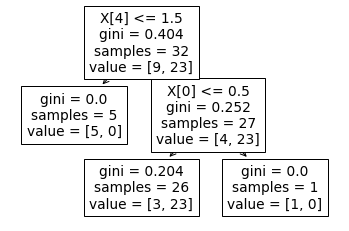

In [52]:
#DecisionTree
clf_NDT = DecisionTreeClassifier(random_state=0, max_depth=2)
clf_NDT = clf_NDT.fit(X,y)
tree.plot_tree(clf_NDT)
plt.show()

### Random Forest

In [56]:
#RandomForest
clf_NRF = RandomForestClassifier(max_depth=2, random_state=0)
clf_NRF = clf_NRF.fit(X,y)
fn=X.columns
cn=y.name
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(clf_NRF.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

### XGBoost

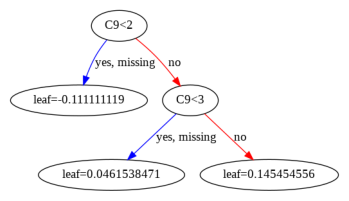

In [57]:
model = XGBClassifier()
model.fit(X, y)
plot_tree(model)
plt.show()

# เปรียบเทียบผลของแต่ละโมเดล Normalization

In [45]:
df_nor = df.copy() #df_normalization
for i in range(len(df_nor.columns)-1): #normalization
  df_nor.iloc[:,i] = (df_nor.iloc[:,i] - df_nor.iloc[:,i].min()) / (df_nor.iloc[:,i].max() - df_nor.iloc[:,i].min())
df_nor

C1   C2   C3        C4   C6   C7   C8  ...  C51  C52  C53  C54  C55  C56  C57
0   0.0  0.0  1.0  0.000000  0.0  0.5  0.5  ...  0.5  0.5  0.0  0.0  0.0  1.0    2
1   0.0  0.0  1.0  1.000000  0.0  1.0  0.0  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
2   0.0  0.0  1.0  1.000000  0.0  1.0  1.0  ...  0.5  0.5  0.5  0.5  1.0  0.0    2
3   0.0  0.0  0.5  1.000000  1.0  1.0  1.0  ...  0.5  0.5  0.5  0.5  1.0  1.0    2
4   0.0  0.0  1.0  0.666667  1.0  1.0  1.0  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
5   0.0  0.0  1.0  1.000000  0.0  1.0  1.0  ...  0.5  0.5  0.5  0.5  1.0  0.0    2
6   0.0  0.0  1.0  0.666667  0.0  1.0  1.0  ...  0.5  0.0  0.5  0.5  1.0  0.0    2
7   0.0  0.0  0.5  0.666667  0.0  1.0  0.0  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
8   0.0  0.0  1.0  0.333333  0.0  1.0  0.0  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
9   0.5  0.0  0.5  1.000000  0.0  0.5  0.5  ...  0.0  1.0  0.5  0.0  0.0  1.0    2
10  0.5  0.0  0.5  0.666667  0.0  1.0  0.5  ...  0.5  0.5  0.5  0.5  1.0  1.0    2
11  0.5  0.0  0.5  1.000000  0.0  0.0  0.5  ...  0.5  0.5  0.0  0.0  1.0  1.0    1
12  0.5  0.0  0.5  0.333333  0.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
13  0.5  0.0  0.5  0.666667  1.0  0.5  1.0  ...  0.5  0.5  0.0  0.0  0.0  1.0    2
14  0.5  1.0  1.0  0.000000  1.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.0  1.0    1
15  0.5  0.0  1.0  0.666667  1.0  0.5  0.5  ...  0.5  0.5  0.5  0.5  1.0  1.0    2
16  0.5  0.0  1.0  0.666667  0.0  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
17  0.5  0.0  0.5  0.333333  0.0  0.5  0.0  ...  0.5  0.5  0.0  0.0  0.0  1.0    2
18  0.5  0.0  0.5  0.000000  0.0  0.5  1.0  ...  0.5  0.5  0.5  0.5  1.0  0.0    2
19  0.5  0.0  0.0  0.666667  0.0  1.0  1.0  ...  0.5  0.5  0.0  0.0  1.0  1.0    1
20  0.5  0.0  0.5  0.000000  1.0  1.0  1.0  ...  0.5  0.0  0.5  0.5  0.0  1.0    2
21  0.5  0.0  1.0  1.000000  0.0  0.5  0.0  ...  0.5  0.5  0.5  0.5  1.0  0.0    2
22  1.0  0.0  0.5  1.000000  1.0  0.5  0.5  ...  1.0  0.0  1.0  1.0  1.0  1.0    1
23  1.0  0.0  0.5  1.000000  1.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  1.0  1.0    1
24  1.0  0.0  1.0  1.000000  0.0  1.0  1.0  ...  0.5  1.0  0.5  0.5  1.0  1.0    1
25  1.0  0.0  0.5  1.000000  0.0  0.0  0.5  ...  0.0  1.0  0.0  0.5  1.0  0.0    2
26  1.0  0.0  0.5  0.666667  0.0  0.5  0.0  ...  0.5  0.5  0.5  0.5  0.0  1.0    1
27  1.0  0.0  0.5  0.666667  0.0  0.5  0.5  ...  0.5  1.0  0.5  0.5  1.0  1.0    1
28  1.0  0.0  1.0  0.666667  0.0  0.5  0.5  ...  1.0  0.0  0.5  0.5  1.0  1.0    2
29  1.0  0.0  0.5  0.333333  0.0  0.5  0.5  ...  0.5  0.5  0.5  0.5  1.0  1.0    1
30  1.0  0.0  0.5  1.000000  1.0  0.5  0.5  ...  0.5  0.5  0.5  0.5  0.0  1.0    2
31  1.0  0.0  0.5  1.000000  0.0  0.5  1.0  ...  0.5  0.5  0.5  0.5  1.0  1.0    2

[32 rows x 55 columns]

In [46]:
X_nor = df_nor.iloc[:,max_list] #Feature_selection_SFFS
y_nor = df_nor.iloc[:,-1]
X_nor

C2   C3   C6   C8   C9  C10  C11  ...  C44  C45  C46  C50  C51  C53  C54
0   0.0  1.0  0.0  0.5  0.5  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.0  0.0
1   0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.5  0.5  0.0  0.5  0.5  0.5  0.5
2   0.0  1.0  0.0  1.0  1.0  0.0  0.0  ...  0.5  0.0  0.5  0.5  0.5  0.5  0.5
3   0.0  0.5  1.0  1.0  1.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
4   0.0  1.0  1.0  1.0  1.0  0.5  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
5   0.0  1.0  0.0  1.0  1.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
6   0.0  1.0  0.0  1.0  1.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
7   0.0  0.5  0.0  0.0  1.0  1.0  1.0  ...  0.5  0.5  0.0  0.0  0.5  0.5  0.5
8   0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.5  0.0  0.5  0.5  0.5  0.5  0.5
9   0.0  0.5  0.0  0.5  0.5  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.0  0.5  0.0
10  0.0  0.5  0.0  0.5  1.0  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
11  0.0  0.5  0.0  0.5  0.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.0  0.0
12  0.0  0.5  0.0  0.5  0.5  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
13  0.0  0.5  1.0  1.0  1.0  0.0  0.0  ...  0.5  0.5  0.0  0.5  0.5  0.0  0.0
14  1.0  1.0  1.0  0.5  0.5  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
15  0.0  1.0  1.0  0.5  0.5  0.0  0.0  ...  0.5  0.0  0.5  0.5  0.5  0.5  0.5
16  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
17  0.0  0.5  0.0  0.0  1.0  0.0  0.0  ...  0.5  0.0  0.5  0.5  0.5  0.0  0.0
18  0.0  0.5  0.0  1.0  1.0  1.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
19  0.0  0.0  0.0  1.0  1.0  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.5  0.0  0.0
20  0.0  0.5  1.0  1.0  1.0  0.0  0.5  ...  0.5  0.0  0.5  0.5  0.5  0.5  0.5
21  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.5  0.5  0.5  0.0  0.5  0.5  0.5
22  0.0  0.5  1.0  0.5  0.0  0.0  0.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
23  0.0  0.5  1.0  0.5  0.0  0.0  0.0  ...  1.0  0.5  0.5  0.5  0.5  0.5  0.5
24  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
25  0.0  0.5  0.0  0.5  0.5  0.0  0.5  ...  0.5  0.5  0.5  0.5  0.0  0.0  0.5
26  0.0  0.5  0.0  0.0  0.5  0.0  0.0  ...  0.0  0.5  0.5  0.5  0.5  0.5  0.5
27  0.0  0.5  0.0  0.5  0.5  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
28  0.0  1.0  0.0  0.5  0.5  0.0  0.0  ...  1.0  0.5  0.5  0.5  1.0  0.5  0.5
29  0.0  0.5  0.0  0.5  0.0  0.0  0.0  ...  0.5  1.0  1.0  1.0  0.5  0.5  0.5
30  0.0  0.5  1.0  0.5  1.0  0.0  0.0  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5
31  0.0  0.5  0.0  1.0  1.0  0.0  0.0  ...  0.5  0.0  0.5  0.5  0.5  0.5  0.5

[32 rows x 26 columns]

### Cross Validation 5

In [49]:
NDT = cross_val_score(clf_NDT, X_nor, y_nor, cv=5)
print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (NDT.mean(), NDT.std() * 2))
NRF = cross_val_score(clf_NRF, X_nor, y_nor, cv=5)
print("Accuracy RandomForest: %0.2f (+/- %0.2f)" % (NRF.mean(), NRF.std() * 2))
XGB = cross_val_score(model, X_nor, y_nor, cv=5)
print("Accuracy XGBoost: %0.2f (+/- %0.2f)" % (XGB.mean(), XGB.std() * 2))

Accuracy Decision Tree: 0.81 (+/- 0.14)
Accuracy RandomForest: 0.84 (+/- 0.21)
Accuracy XGBoost: 0.81 (+/- 0.23)


### Cross Validation 10

In [50]:
NDT = cross_val_score(clf_NDT, X_nor, y_nor, cv=10)
print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (NDT.mean(), NDT.std() * 2))
NRF = cross_val_score(clf_NRF, X_nor, y_nor, cv=10)
print("Accuracy RandomForest: %0.2f (+/- %0.2f)" % (NRF.mean(), NRF.std() * 2))
XGB = cross_val_score(model, X_nor, y_nor, cv=10)
print("Accuracy XGBoost: %0.2f (+/- %0.2f)" % (XGB.mean(), XGB.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy Decision Tree: 0.84 (+/- 0.44)
Accuracy RandomForest: 0.81 (+/- 0.43)
Accuracy XGBoost: 0.81 (+/- 0.53)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


# Tree Non-Normalization

### Decision Tree

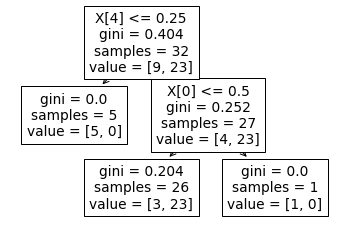

In [58]:
#DecisionTree
clf_NDT = DecisionTreeClassifier(random_state=0, max_depth=2)
clf_NDT = clf_NDT.fit(X_nor,y_nor)
tree.plot_tree(clf_NDT)
plt.show()

### Random Forest

In [60]:
#RandomForest
clf_NRF = RandomForestClassifier(max_depth=2, random_state=0)
clf_NRF = clf_NRF.fit(X_nor,y_nor)
fn=X_nor.columns
cn=y_nor.name
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(clf_NRF.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

### XGBoost

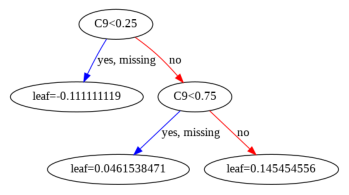

In [61]:
model = XGBClassifier()
model.fit(X_nor, y_nor)
plot_tree(model)
plt.show()